In [1]:
# # Run this and then restart the kernel at the start of each session to install
# # 'teotil3' in development mode
# !pip install -e /home/jovyan/projects/teotil3/

In [2]:
import os

import matplotlib.pyplot as plt
import nivapy3 as nivapy
import pandas as pd
import teotil3 as teo
from matplotlib.ticker import MaxNLocator

plt.style.use("ggplot")

In [3]:
# Connect to JupyterHub's PostGIS database
eng = nivapy.da.connect_postgis()

Connection successful.


# Task 2.15: Testing, documentation and reporting

## Part R: Isesjøen

### 1. User input

In [4]:
# Vannmiljø params
vm_st_yr = 2000
vm_end_yr = 2023
vm_stn_ids = [
    "002-50866",
    "002-31073",
    "002-30755",
]
vm_par_ids = ["P-TOT", "N-TOT"]

# TEOTIL3 params
reg_id = "002.A5B"
teo_st_yr = 2013
teo_end_yr = 2022
totp_ges_ugpl = 20
totn_ges_ugpl = 500
nve_data_year = 2023
admin_year = 2022

# TEOTIL2 pars
teo2_reg_id = "002.A5B"

# Vann-nett params
vn_st_yr = 2016
vn_end_yr = 2022
totn_ugpl = 695
totp_ugpl = 24

### 2. TEOTIL modelling

#### 2.1. Read output

In [5]:
# Get regines
reg_gdf = teo.io.get_regine_geodataframe(eng, admin_year)

# Read single input file and build network
data_fold = r"/home/jovyan/shared/common/teotil3/annual_input_data"
csv_path = os.path.join(
    data_fold,
    f"teotil3_input_data_nve{nve_data_year}_2013.csv",
)
in_df = pd.read_csv(csv_path)
g = teo.model.build_graph(in_df, id_col="regine", next_down_col="regine_down")

# Read model results
eval_fold = r"/home/jovyan/shared/common/teotil3/evaluation"
mod_csv = os.path.join(eval_fold, f"teo3_results_nve{nve_data_year}_2013-2022.csv")
mod_df = pd.read_csv(mod_csv)

mod_df.head()

,regine,regine_down,accum_agriculture-background_din_kg,accum_agriculture-background_ss_kg,accum_agriculture-background_tdp_kg,accum_agriculture-background_toc_kg,accum_agriculture-background_ton_kg,accum_agriculture-background_totn_kg,accum_agriculture-background_totp_kg,accum_agriculture-background_tpp_kg,...,local_urban_tpp_kg,local_wood_din_kg,local_wood_ss_kg,local_wood_tdp_kg,local_wood_toc_kg,local_wood_ton_kg,local_wood_totn_kg,local_wood_totp_kg,local_wood_tpp_kg,year
0,001.10,001.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,36.1,849.2,0.6,9938.9,186.2,222.3,5.4,4.8,2013
1,001.1A2B,001.1A2A,123.574401,0.752367,3.420677,6341.957239,68.505729,192.080130,3.609359,0.188682,...,5.6,1318.1,29798.4,23.9,384175.8,7138.8,8456.9,210.0,186.1,2013
2,001.1A4D,001.1A4C,15.917595,0.289332,0.117126,464.712746,6.729665,22.647261,0.149627,0.032501,...,0.0,237.2,5272.5,4.3,70016.3,1296.4,1533.6,38.2,33.9,2013
3,001.1M,001.1L,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,473.5,11104.0,8.8,142788.5,2641.6,3115.1,78.3,69.5,2013
4,001.21,001.,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,5.0,117.0,0.1,1386.1,25.9,30.9,0.8,0.7,2013


#### 2.2. Plot catchment and results

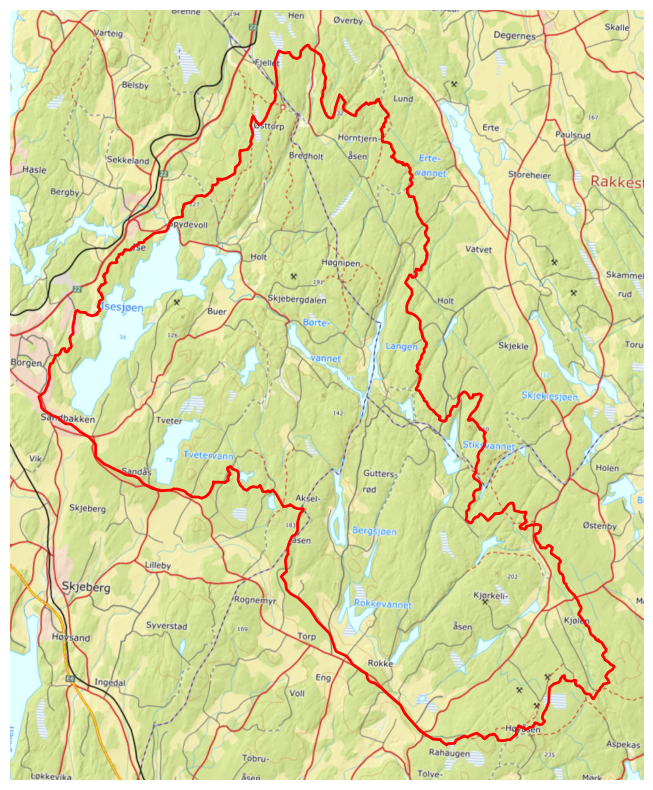

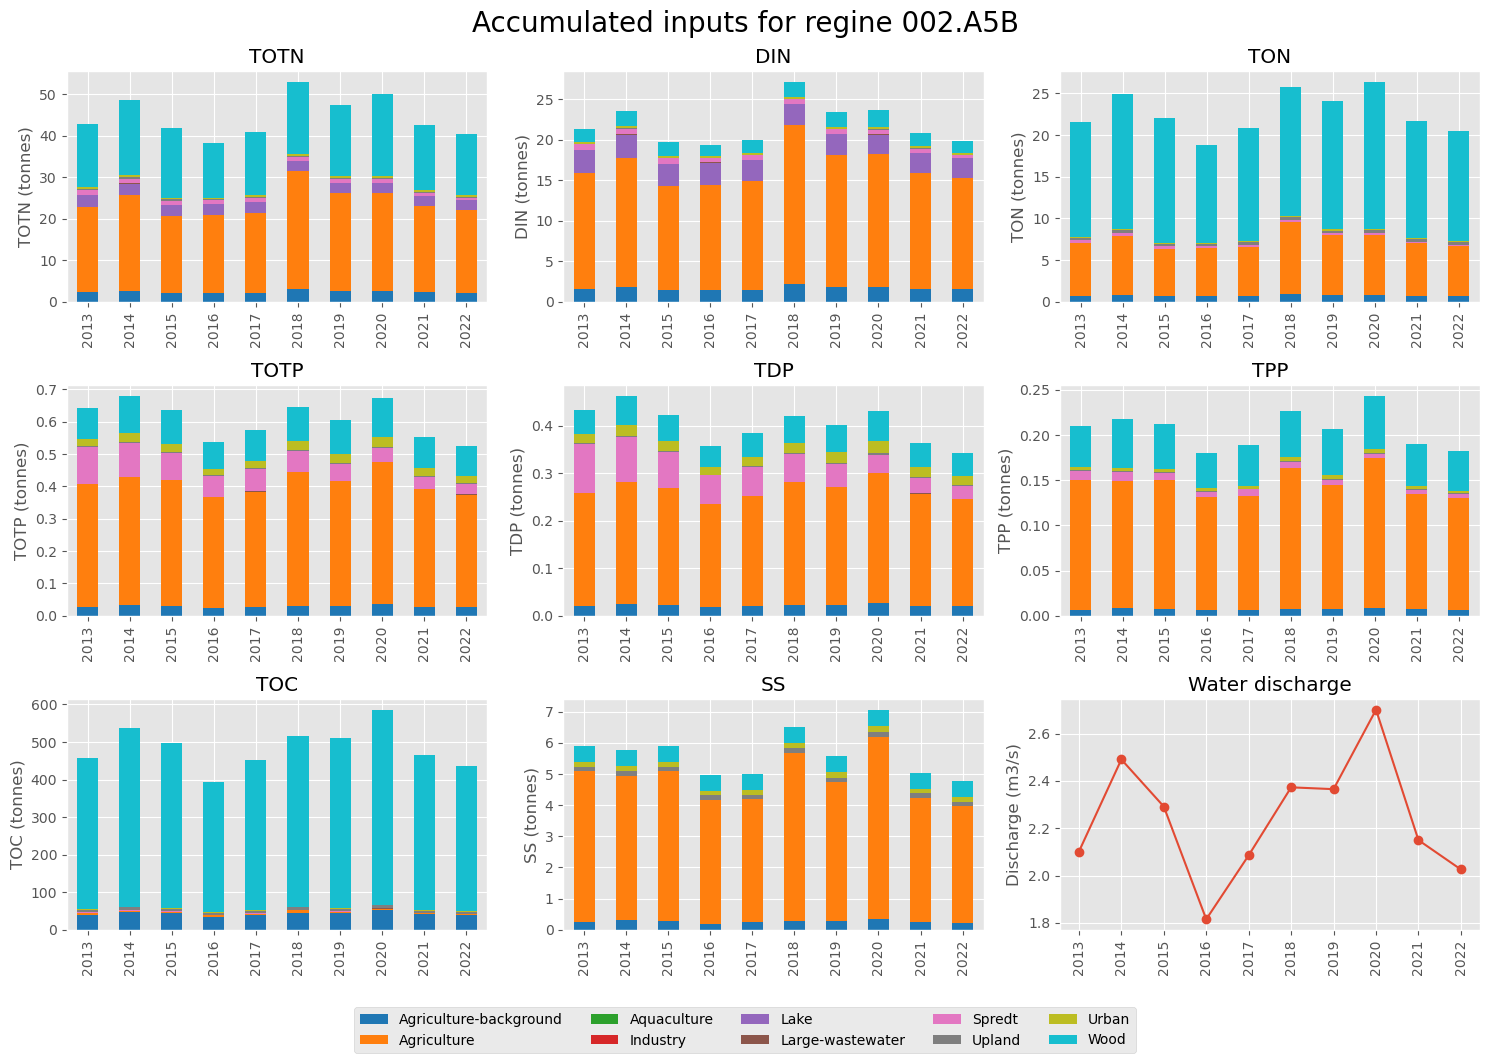

In [6]:
# Plot regine and all contributing regines upstream
gdf, ax = teo.vis.plot_catchment(
    g, reg_id, reg_gdf, id_col="regine", include_connected=True, direct="up"
)
axes = teo.vis.plot_regine_barchart(reg_id, mod_df, stat="accum", index_col="year")

#### 2.3. Avlastningsbehov

In [7]:
totp_res_dict = teo.model.get_avlastningsbehov(
    reg_id,
    "TOTP",
    totp_ges_ugpl,
    mod_df,
    st_yr=teo_st_yr,
    end_yr=teo_end_yr,
    index_col="year",
)

Selected regine:	002.A5B.
Selected parameter:	TOTP.
Time period:		2013 to 2022.
Concentration for GES:	20 ug/l.

The regine contains 1 lake(s):
	vatnLnrs:	[133]

Estimated mean outflow concentration(s) (2013-2022):
	TOTP (ug/l)                          8.6
	TDP (ug/l)                           5.7
	TPP (ug/l)                           2.9

Estimated mean annual outflow flux(es) (2013-2022):
	TOTP (kg)                            607
	TDP (kg)                             402
	TPP (kg)                             206

Source apportionment for outflow TOTP:
	Agriculture (%)                     62.9
	Wood (%)                            16.8
	Spredt (%)                          10.9
	Agriculture-background (%)           4.8
	Urban (%)                            4.0
	Upland (%)                           0.5
	Large-wastewater (%)                 0.0

Maximum outflow flux for GES (kg/yr)	    1414
Transmission factor (weighted) for TOTP     0.43
Maximum inflow flux for GES (kg/yr)	    3254
Estim

In [8]:
totn_res_dict = teo.model.get_avlastningsbehov(
    reg_id,
    "TOTN",
    totn_ges_ugpl,
    mod_df,
    st_yr=teo_st_yr,
    end_yr=teo_end_yr,
    index_col="year",
)

Selected regine:	002.A5B.
Selected parameter:	TOTN.
Time period:		2013 to 2022.
Concentration for GES:	500 ug/l.

The regine contains 1 lake(s):
	vatnLnrs:	[133]

Estimated mean outflow concentration(s) (2013-2022):
	TOTN (ug/l)                        630.7
	DIN (ug/l)                         310.1
	TON (ug/l)                         320.6

Estimated mean annual outflow flux(es) (2013-2022):
	TOTN (kg)                          44486
	DIN (kg)                           21844
	TON (kg)                           22642

Source apportionment for outflow TOTN:
	Agriculture (%)                     48.5
	Wood (%)                            36.6
	Lake (%)                             5.8
	Agriculture-background (%)           5.4
	Spredt (%)                           1.9
	Urban (%)                            0.8
	Upland (%)                           0.8
	Large-wastewater (%)                 0.1

Maximum outflow flux for GES (kg/yr)	   35342
Transmission factor (weighted) for TOTN     0.68
Maximum

#### 2.4. TEOTIL2 results

In [9]:
df_list = []
for year in range(teo_st_yr, teo_end_yr + 1):
    url = f"https://raw.githubusercontent.com/NIVANorge/teotil2/main/data/norway_annual_output_data/teotil2_results_{year}.csv"
    teo2_df = pd.read_csv(url).query("regine == @teo2_reg_id")[
        [
            "accum_all_sources_tot-n_tonnes",
            "accum_all_sources_tot-p_tonnes",
            "accum_q_m3/s",
        ]
    ]
    if len(teo2_df) != 1:
        print(f"WARNING: TEOTIL2 data not found for '{reg_id}' in {year}.")
        continue
    teo2_df["year"] = year
    df_list.append(teo2_df)

teo2_df = pd.concat(df_list, axis="rows")
teo2_df["TOTN_ug/l"] = (
    teo2_df["accum_all_sources_tot-n_tonnes"]
    * 1e12
    / (teo2_df["accum_q_m3/s"] * 60 * 60 * 24 * 365.25 * 1000)
)
teo2_df["TOTP_ug/l"] = (
    teo2_df["accum_all_sources_tot-p_tonnes"]
    * 1e12
    / (teo2_df["accum_q_m3/s"] * 60 * 60 * 24 * 365.25 * 1000)
)
teo2_df = teo2_df.set_index("year")[["TOTN_ug/l", "TOTP_ug/l"]]
teo2_df.mean()

TOTN_ug/l    1082.523236
TOTP_ug/l      29.332124
dtype: float64

### 3. Get data from Vannmiljø

In [10]:
# Query results from VM API
data = {
    "FromDateSamplingTime": f"{vm_st_yr}-01-01",
    "ToDateSamplingTime": f"{vm_end_yr}-12-31",
    "FromRegDate": "1900-01-01",
    "WaterLocationCodeFilter": vm_stn_ids,
}
obs_df = nivapy.da.post_data_to_vannmiljo("GetRegistrations", data=data)
obs_df = obs_df.query("ParameterID in @vm_par_ids")
obs_df["SamplingTime"] = pd.to_datetime(obs_df["SamplingTime"])
obs_df["Year"] = obs_df["SamplingTime"].dt.year
cols = [
    "WaterLocationCode",
    "Name",
    "ActivityID",
    "MediumID",
    "SamplingTime",
    "Year",
    "ParameterID",
    "UpperDepth",
    "LowerDepth",
    "ValueOperator",
    "RegValue",
    "Unit",
]
obs_df = obs_df[cols]
obs_df.head()

,WaterLocationCode,Name,ActivityID,MediumID,SamplingTime,Year,ParameterID,UpperDepth,LowerDepth,ValueOperator,RegValue,Unit
501,002-30755,Isesjøen (ISE1),TILT,VF,2016-05-26,2016,N-TOT,0.0,4.0,=,670.0,µg/l N
502,002-30755,Isesjøen (ISE1),TILT,VF,2016-06-20,2016,N-TOT,0.0,4.0,=,590.0,µg/l N
507,002-30755,Isesjøen (ISE1),TILT,VF,2016-05-26,2016,P-TOT,0.0,4.0,=,24.0,µg/l P
508,002-30755,Isesjøen (ISE1),TILT,VF,2016-06-20,2016,P-TOT,0.0,4.0,=,21.0,µg/l P
519,002-30755,Isesjøen (ISE1),TILT,VF,2016-07-21,2016,P-TOT,0.0,4.0,=,24.0,µg/l P


In [11]:
obs_df.groupby(["Year", "ParameterID"]).count()

WaterLocationCode  Name  ActivityID  MediumID  SamplingTime  \
Year ParameterID                                                                
2000 N-TOT                        7     7           7         7             7   
     P-TOT                       13    13          13        13            13   
2001 N-TOT                        6     6           6         6             6   
     P-TOT                       11    11          11        11            11   
2002 N-TOT                        6     6           6         6             6   
     P-TOT                        9     9           9         9             9   
2003 N-TOT                       10    10          10        10            10   
     P-TOT                       12    12          12        12            12   
2004 N-TOT                        6     6           6         6             6   
     P-TOT                        9     9           9         9             9   
2005 N-TOT                        6     6           6         6             6   
     P-TOT                       12    12          12        12            12   
2006 N-TOT                        5     5           5         5             5   
     P-TOT                        9     9           9         9             9   
2007 N-TOT                        6     6           6         6             6   
     P-TOT                       10    10          10        10            10   
2008 P-TOT                        6     6           6         6             6   
2009 N-TOT                        6     6           6         6             6   
     P-TOT                       10    10          10        10            10   
2010 N-TOT                        6     6           6         6             6   
     P-TOT                        9     9           9         9             9   
2011 N-TOT                        6     6           6         6             6   
     P-TOT                        6     6           6         6             6   
2012 N-TOT                        4     4           4         4             4   
     P-TOT                        4     4           4         4             4   
2013 N-TOT                        6     6           6         6             6   
     P-TOT                        6     6           6         6             6   
2014 N-TOT                        6     6           6         6             6   
     P-TOT                        6     6           6         6             6   
2015 N-TOT                        6     6           6         6             6   
     P-TOT                        6     6           6         6             6   
2016 N-TOT                       10    10          10        10            10   
     P-TOT                       12    12          12        12            12   
2017 N-TOT                        4     4           4         4             4   
     P-TOT                       12    12          12        12            12   
2019 N-TOT                        6     6           6         6             6   
     P-TOT                        6     6           6         6             6   
2020 N-TOT                        6     6           6         6             6   
     P-TOT                        6     6           6         6             6   
2022 N-TOT                        6     6           6         6             6   
     P-TOT                        6     6           6         6             6   
2023 N-TOT                        6     6           6         6             6   
     P-TOT                        6     6           6         6             6   

                  UpperDepth  LowerDepth  ValueOperator  RegValue  Unit  
Year ParameterID                                                         
2000 N-TOT                 6           6              7         7     7  
     P-TOT                 6           6             13        13    13  
2001 N-TOT                 6           6              6         6     6  
  

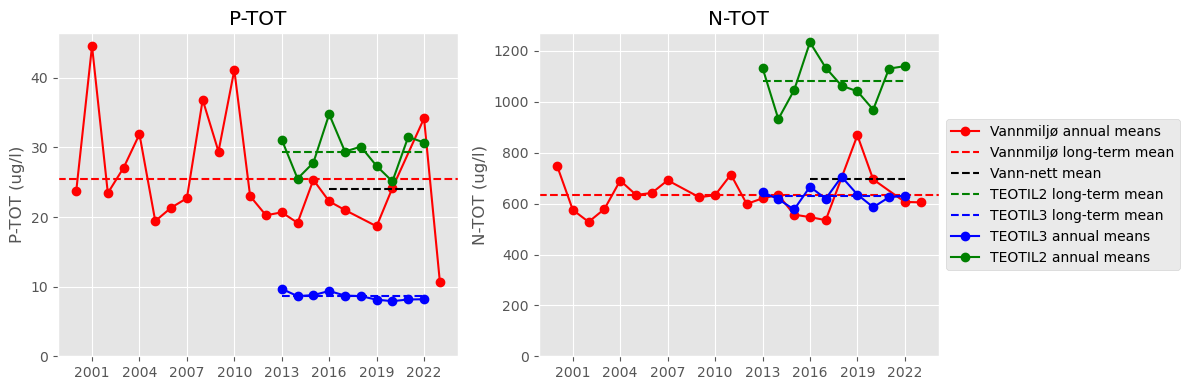

In [12]:
# Plot
df = obs_df.groupby(["ParameterID", "Year"])["RegValue"].mean().reset_index()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
for idx, par in enumerate(vm_par_ids):
    par_df = df.query("ParameterID == @par").sort_values("Year")
    obs_mean = par_df["RegValue"].mean()
    axes[idx].plot(
        par_df["Year"], par_df["RegValue"], "ro-", label="Vannmiljø annual means"
    )
    axes[idx].axhline(obs_mean, ls="--", c="r", label="Vannmiljø long-term mean")
    if par == "N-TOT":
        teo_mean = totn_res_dict["conc_df"]["TOTN_ug/l"].mean()
        teo2_mean = teo2_df["TOTN_ug/l"].mean()
        axes[idx].plot(
            [vn_st_yr, vn_end_yr], [totn_ugpl, totn_ugpl], "k--", label="Vann-nett mean"
        )
        axes[idx].plot(
            [teo_st_yr, teo_end_yr],
            [teo2_mean, teo2_mean],
            "g--",
            label="TEOTIL2 long-term mean",
        )
        axes[idx].plot(
            [teo_st_yr, teo_end_yr],
            [teo_mean, teo_mean],
            "b--",
            label="TEOTIL3 long-term mean",
        )
        totn_res_dict["conc_df"][["TOTN_ug/l"]].plot(
            ax=axes[idx],
            legend=False,
            marker="o",
            c="b",
        )
        axes[idx].lines[-1].set_label("TEOTIL3 annual means")
        teo2_df["TOTN_ug/l"].plot(
            ax=axes[idx],
            legend=False,
            marker="o",
            c="g",
        )
        axes[idx].lines[-1].set_label("TEOTIL2 annual means")
    else:
        teo_mean = totp_res_dict["conc_df"]["TOTP_ug/l"].mean()
        teo2_mean = teo2_df["TOTP_ug/l"].mean()
        axes[idx].plot(
            [vn_st_yr, vn_end_yr], [totp_ugpl, totp_ugpl], "k--", label="Vann-nett mean"
        )
        axes[idx].plot(
            [teo_st_yr, teo_end_yr],
            [teo2_mean, teo2_mean],
            "g--",
            label="TEOTIL2 long-term mean",
        )
        axes[idx].plot(
            [teo_st_yr, teo_end_yr],
            [teo_mean, teo_mean],
            "b--",
            label="TEOTIL3 long-term mean",
        )
        totp_res_dict["conc_df"][["TOTP_ug/l"]].plot(
            ax=axes[idx],
            legend=False,
            marker="o",
            c="b",
        )
        axes[idx].lines[-1].set_label("TEOTIL3 annual means")
        teo2_df["TOTP_ug/l"].plot(
            ax=axes[idx],
            legend=False,
            marker="o",
            c="g",
        )
        axes[idx].lines[-1].set_label("TEOTIL2 annual means")
    axes[idx].set_title(par)
    axes[idx].set_xlabel("")
    axes[idx].set_ylabel(f"{par} (ug/l)")
    axes[idx].xaxis.set_major_locator(MaxNLocator(integer=True))
    axes[idx].set_ylim(ymin=0)
axes[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.tight_layout()